<A HREF="https://www.geeksforgeeks.org/emotion-classification-using-nrc-lexicon-in-python/">G4G Emotion Classification using NRC Lexicon</A><P>
    <A HREF="https://github.com/metalcorebear/NRCLex">NRC Lexicon</A>

In [36]:
#!pip3 install NRCLex
#!python3 -m textblob.download_corpora

In [3]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import os # to check if directory exists and create it if it doesn't
from datetime import datetime # to parse speech date
from nrclex import NRCLex

In [27]:
# Load up the files
#path = './DataUCSB/'
#path = './Data/'
#list_of_files = []

#for root, dirs, files in os.walk(path):
#    for file in files:
#        if file.endswith('.txt'):
#            list_of_files.append(os.path.join(root,file))

list_of_files = ['./Data/barackobamabostonmarathonexplosionsfirststatement.txt',
                 './NYTimes/04-16-2013-BostonMarathon.txt', 
                 './WSJ/04-16-2013-BostonMarathon.txt']
speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
    speeches.append(text)

In [28]:
emotions = []
for i in range(len(speeches)):
    emotions.append(NRCLex(speeches[i]))

In [29]:
emotions

Sr.	Method	Description<BR>
1	emotion.words 	        Return words list.<BR>
2	emotion.sentences	     Return sentences list.<BR>
3	emotion.affect_list	Return affect list.<BR>
4	emotion.affect_dict	Return affect dictionary.<BR>
5	emotion.raw_emotion_scores	Return raw emotional counts.<BR>
6	emotion.top_emotions	Return highest emotions.<BR>
7	emotion.affect_frequencies	Return affect frequencies.<BR>

In [31]:
[emotion.affect_frequencies for emotion in emotions] 

[{'fear': 0.07766990291262135,
  'anger': 0.019417475728155338,
  'anticip': 0.0,
  'trust': 0.20388349514563106,
  'surprise': 0.019417475728155338,
  'positive': 0.3300970873786408,
  'negative': 0.10679611650485436,
  'sadness': 0.06796116504854369,
  'disgust': 0.019417475728155338,
  'joy': 0.08737864077669903,
  'anticipation': 0.06796116504854369},
 {'fear': 0.16216216216216217,
  'anger': 0.11056511056511056,
  'anticip': 0.0,
  'trust': 0.11547911547911548,
  'surprise': 0.07125307125307126,
  'positive': 0.11302211302211303,
  'negative': 0.1891891891891892,
  'sadness': 0.08353808353808354,
  'disgust': 0.036855036855036855,
  'joy': 0.03194103194103194,
  'anticipation': 0.085995085995086},
 {'fear': 0.17209302325581396,
  'anger': 0.08837209302325581,
  'anticip': 0.0,
  'trust': 0.11162790697674418,
  'surprise': 0.06511627906976744,
  'positive': 0.11162790697674418,
  'negative': 0.19534883720930232,
  'sadness': 0.08837209302325581,
  'disgust': 0.05116279069767442,
  

In [33]:
import matplotlib
import matplotlib.pyplot as plt # pyplot has bar charts
%matplotlib notebook

<A HREF="https://matplotlib.org/cheatsheets/">Matplotlib cheat sheets</A>

<IPython.core.display.Javascript object>


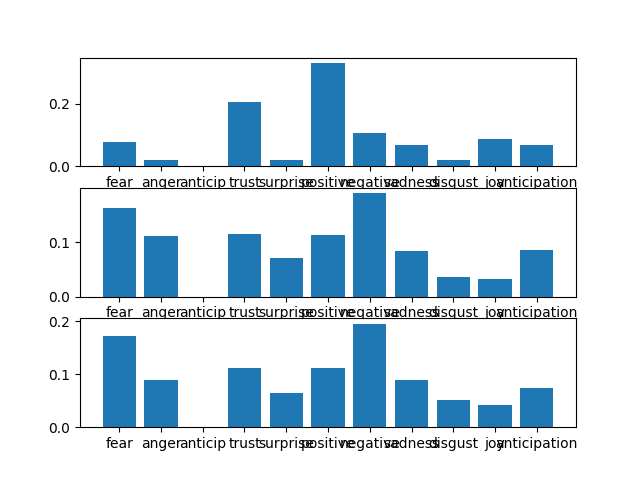

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
names = list(emotions[0].affect_frequencies.keys())

values0 = list(emotions[0].affect_frequencies.values())
ax1.bar(range(len(emotions[0].affect_frequencies)), values0, tick_label=names)

values1 = list(emotions[1].affect_frequencies.values())
ax2.bar(range(len(emotions[1].affect_frequencies)), values1, tick_label=names)

values2 = list(emotions[2].affect_frequencies.values())
ax3.bar(range(len(emotions[2].affect_frequencies)), values2, tick_label=names)

plt.show()

<IPython.core.display.Javascript object>


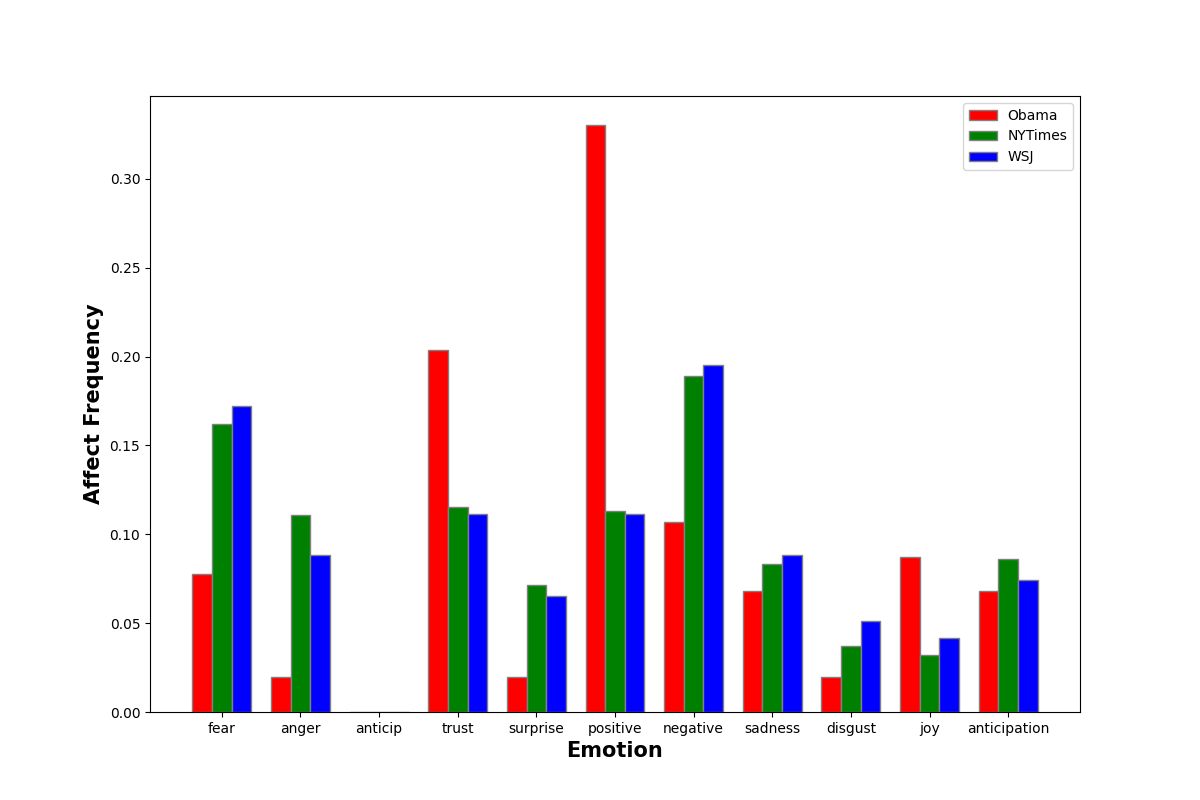

In [46]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
#
names = list(emotions[0].affect_frequencies.keys())
# Values
values0 = list(emotions[0].affect_frequencies.values())
values1 = list(emotions[1].affect_frequencies.values())
values2 = list(emotions[2].affect_frequencies.values())

# Set position of bar on X axis
br1 = np.arange(len(emotions[0].affect_frequencies))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, values0, color ='r', width = barWidth,
        edgecolor ='grey', label ='Obama')
plt.bar(br2, values1, color ='g', width = barWidth,
        edgecolor ='grey', label ='NYTimes')
plt.bar(br3, values2, color ='b', width = barWidth,
        edgecolor ='grey', label ='WSJ')

# Adding Xticks
plt.xlabel('Emotion', fontweight ='bold', fontsize = 15)
plt.ylabel('Affect Frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(emotions[0].affect_frequencies))],names)

plt.legend()
plt.show()